# 1. Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# 2. Load Digits Dataset

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")

Dataset shape: (1797, 64)
Number of classes: 10


# 3. Train-Test Split (80% train, 20% test)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Define classifier pipeline (example: KNN with scaling)

In [5]:
clf = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# 5. Train classifier

In [6]:
clf.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('kneighborsclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


# 6. Test classifier

In [7]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.90      1.00      0.95        35
           3       1.00      0.97      0.99        37
           4       0.97      0.94      0.96        36
           5       1.00      1.00      1.00        37
           6       0.97      1.00      0.99        36
           7       0.95      0.97      0.96        36
           8       0.97      0.89      0.93        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

Accuracy: 0.9667


# 7. Visualize some predictions

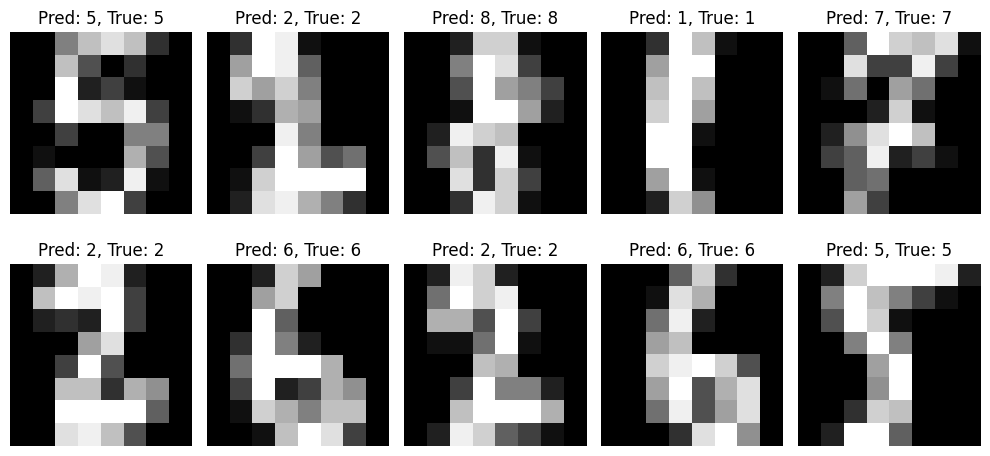

In [8]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, pred, true in zip(axes.flatten(), X_test, y_pred, y_test):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.set_title(f"Pred: {pred}, True: {true}")
    ax.axis('off')
plt.tight_layout()
plt.show()